[0.01438636 0.01421395 0.01404442 0.01384921 0.01361746 0.01335925
 0.0130801  0.01280874 0.01251768 0.01223101 0.01191675]


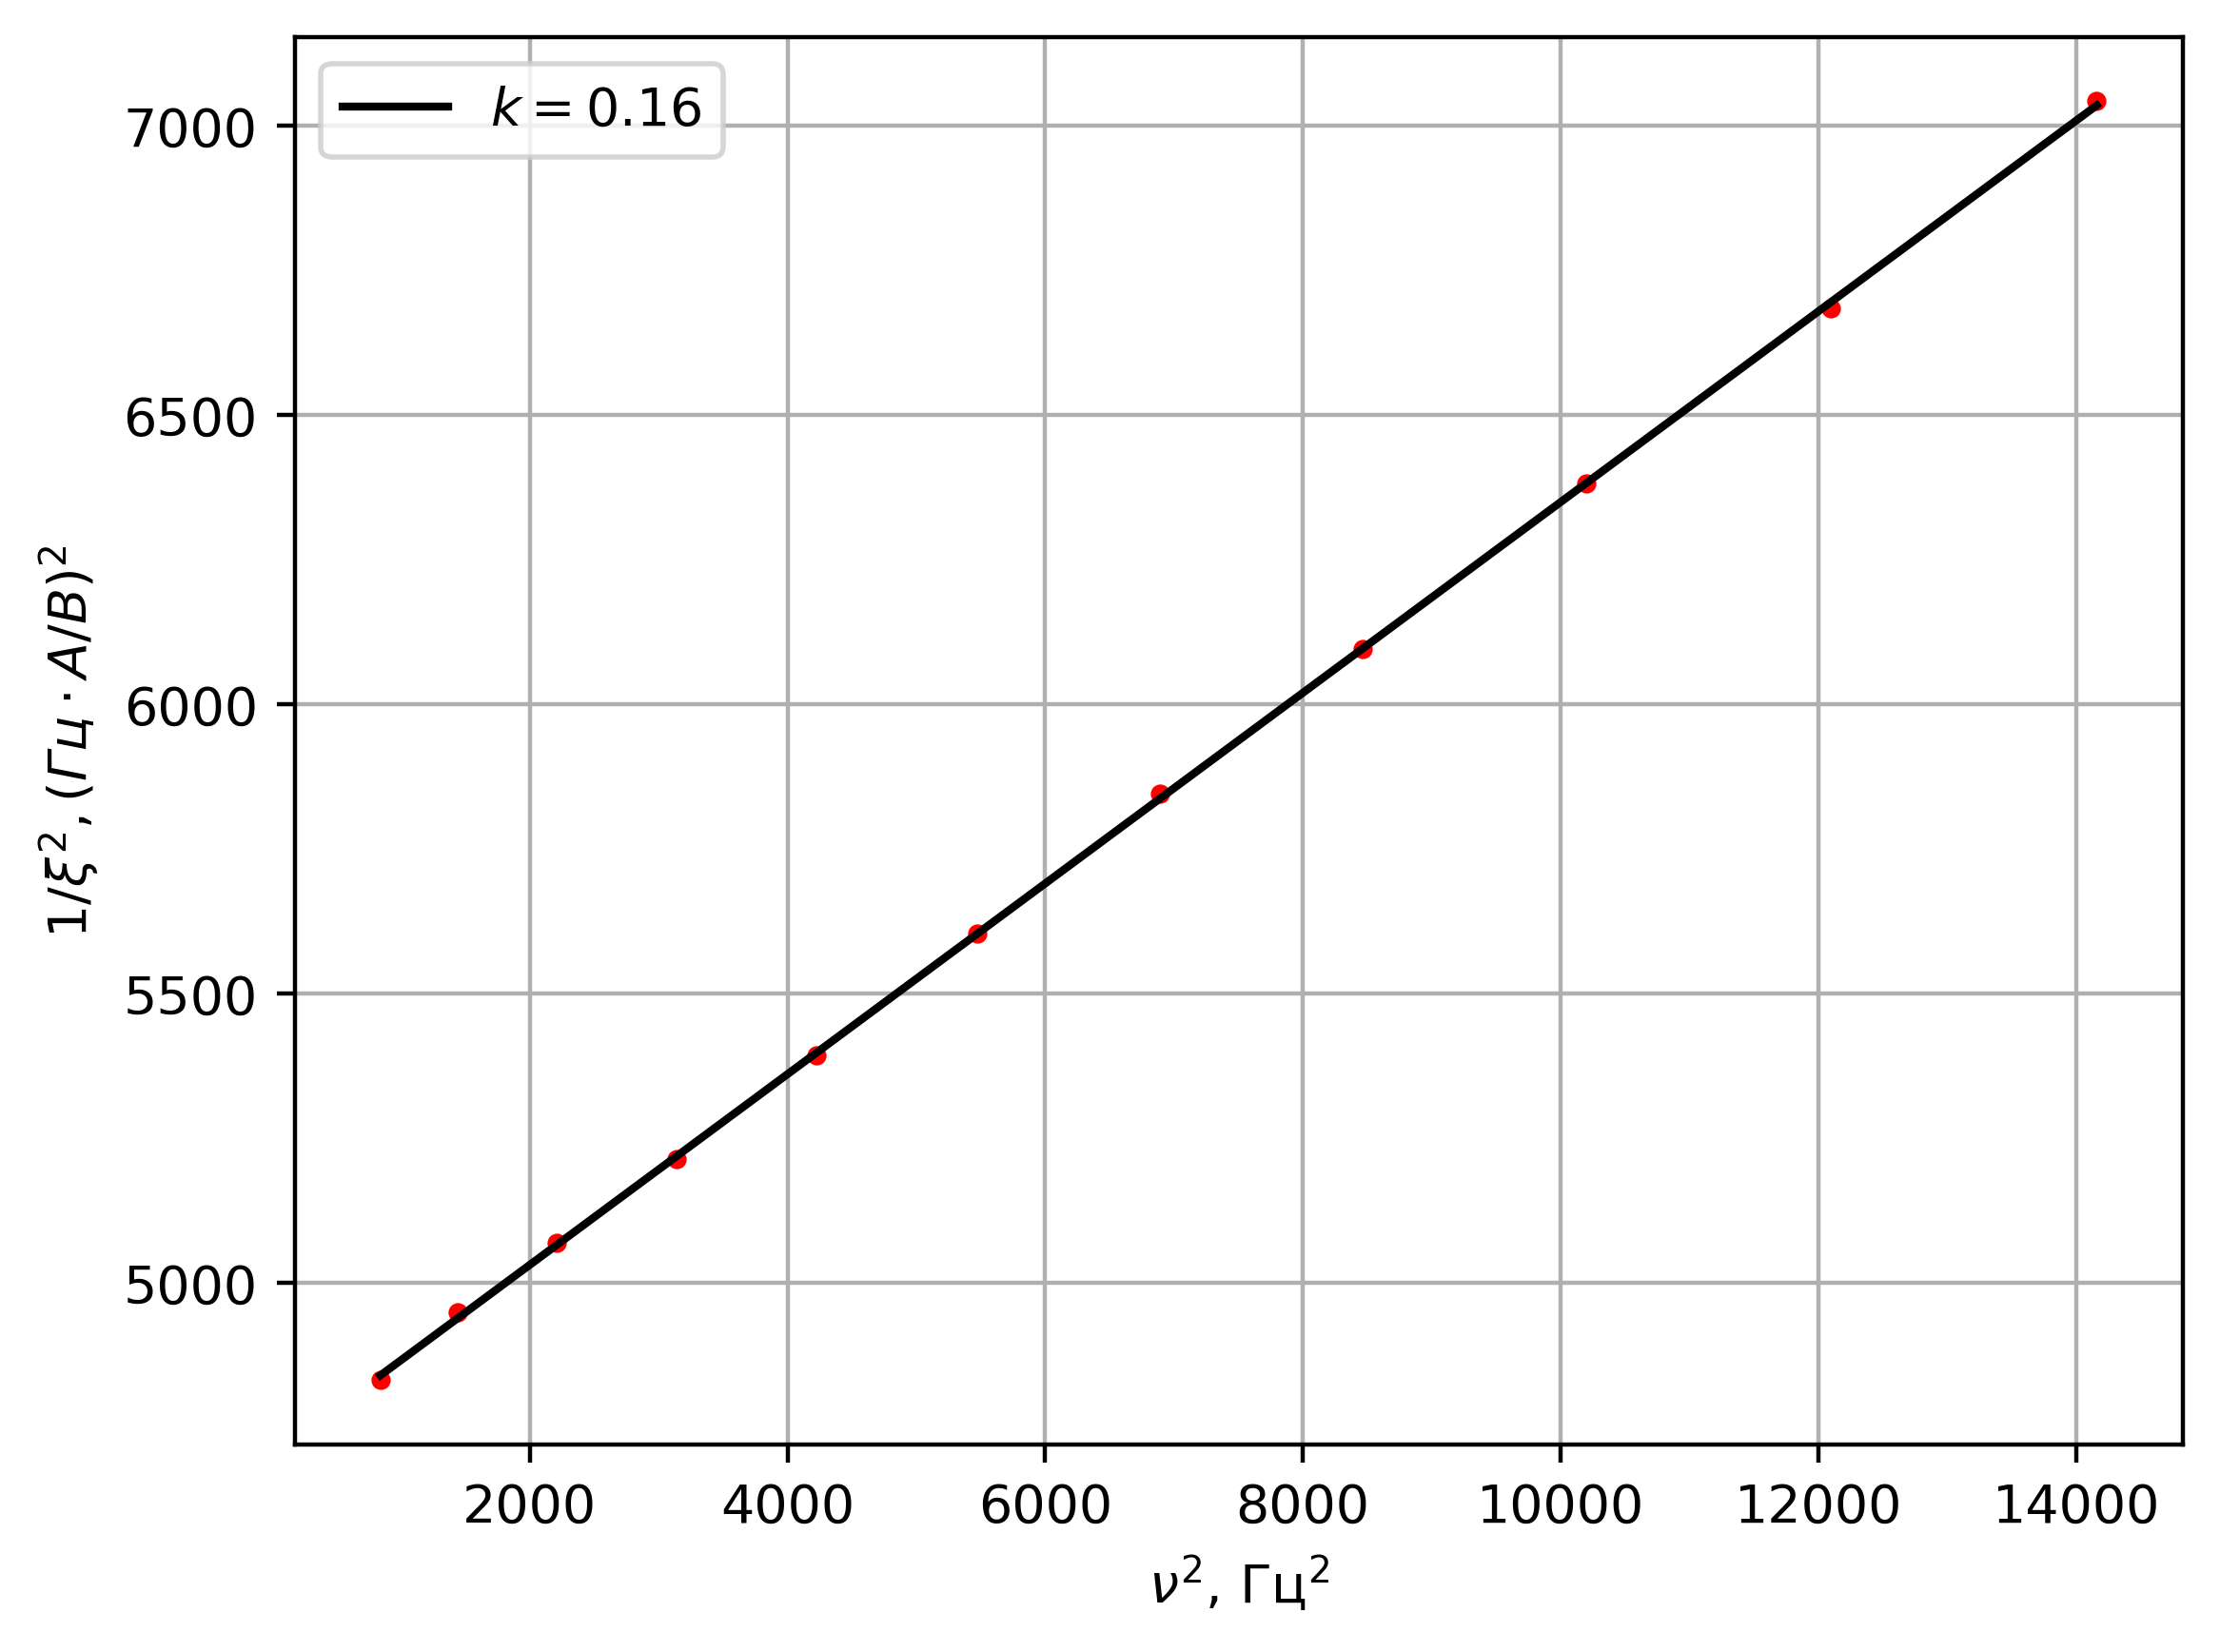

In [137]:
import matplotlib.pyplot as plt
import numpy as np
# matplotlib.use('TkAgg')

V = np.array([ 0.194, 0.249, 0.301, 0.349, 0.393, 0.433, 0.469, 0.502, 0.531, 0.557, 0.580])
I = np.array([ 465, 461, 456, 450, 444, 438, 432, 426, 420, 414, 409])
nu = np.array([ 29, 38, 47, 56, 65, 74, 83, 92, 101, 110, 119])
xi = V / (I * 0.001 * nu)
print(xi)
x = nu ** 2
y = 1 / xi**2

coeffs = np.polyfit(x, y, 1)
k = coeffs[0]
b = coeffs[1]
line_points = [k * number + b for number in x]
plt.figure(dpi=400)
plt.scatter(x, y, s=7., color='red')
line1 = plt.plot(x, line_points, color='black', label = f'$k = {coeffs[0]:.2f}$')

plt.ylabel('$1/\\xi^2, (Гц \\cdot А / В)^2$')
plt.xlabel('$\\nu^2$, Гц$^2$')
plt.grid()
plt.legend()
plt.savefig('nu2')

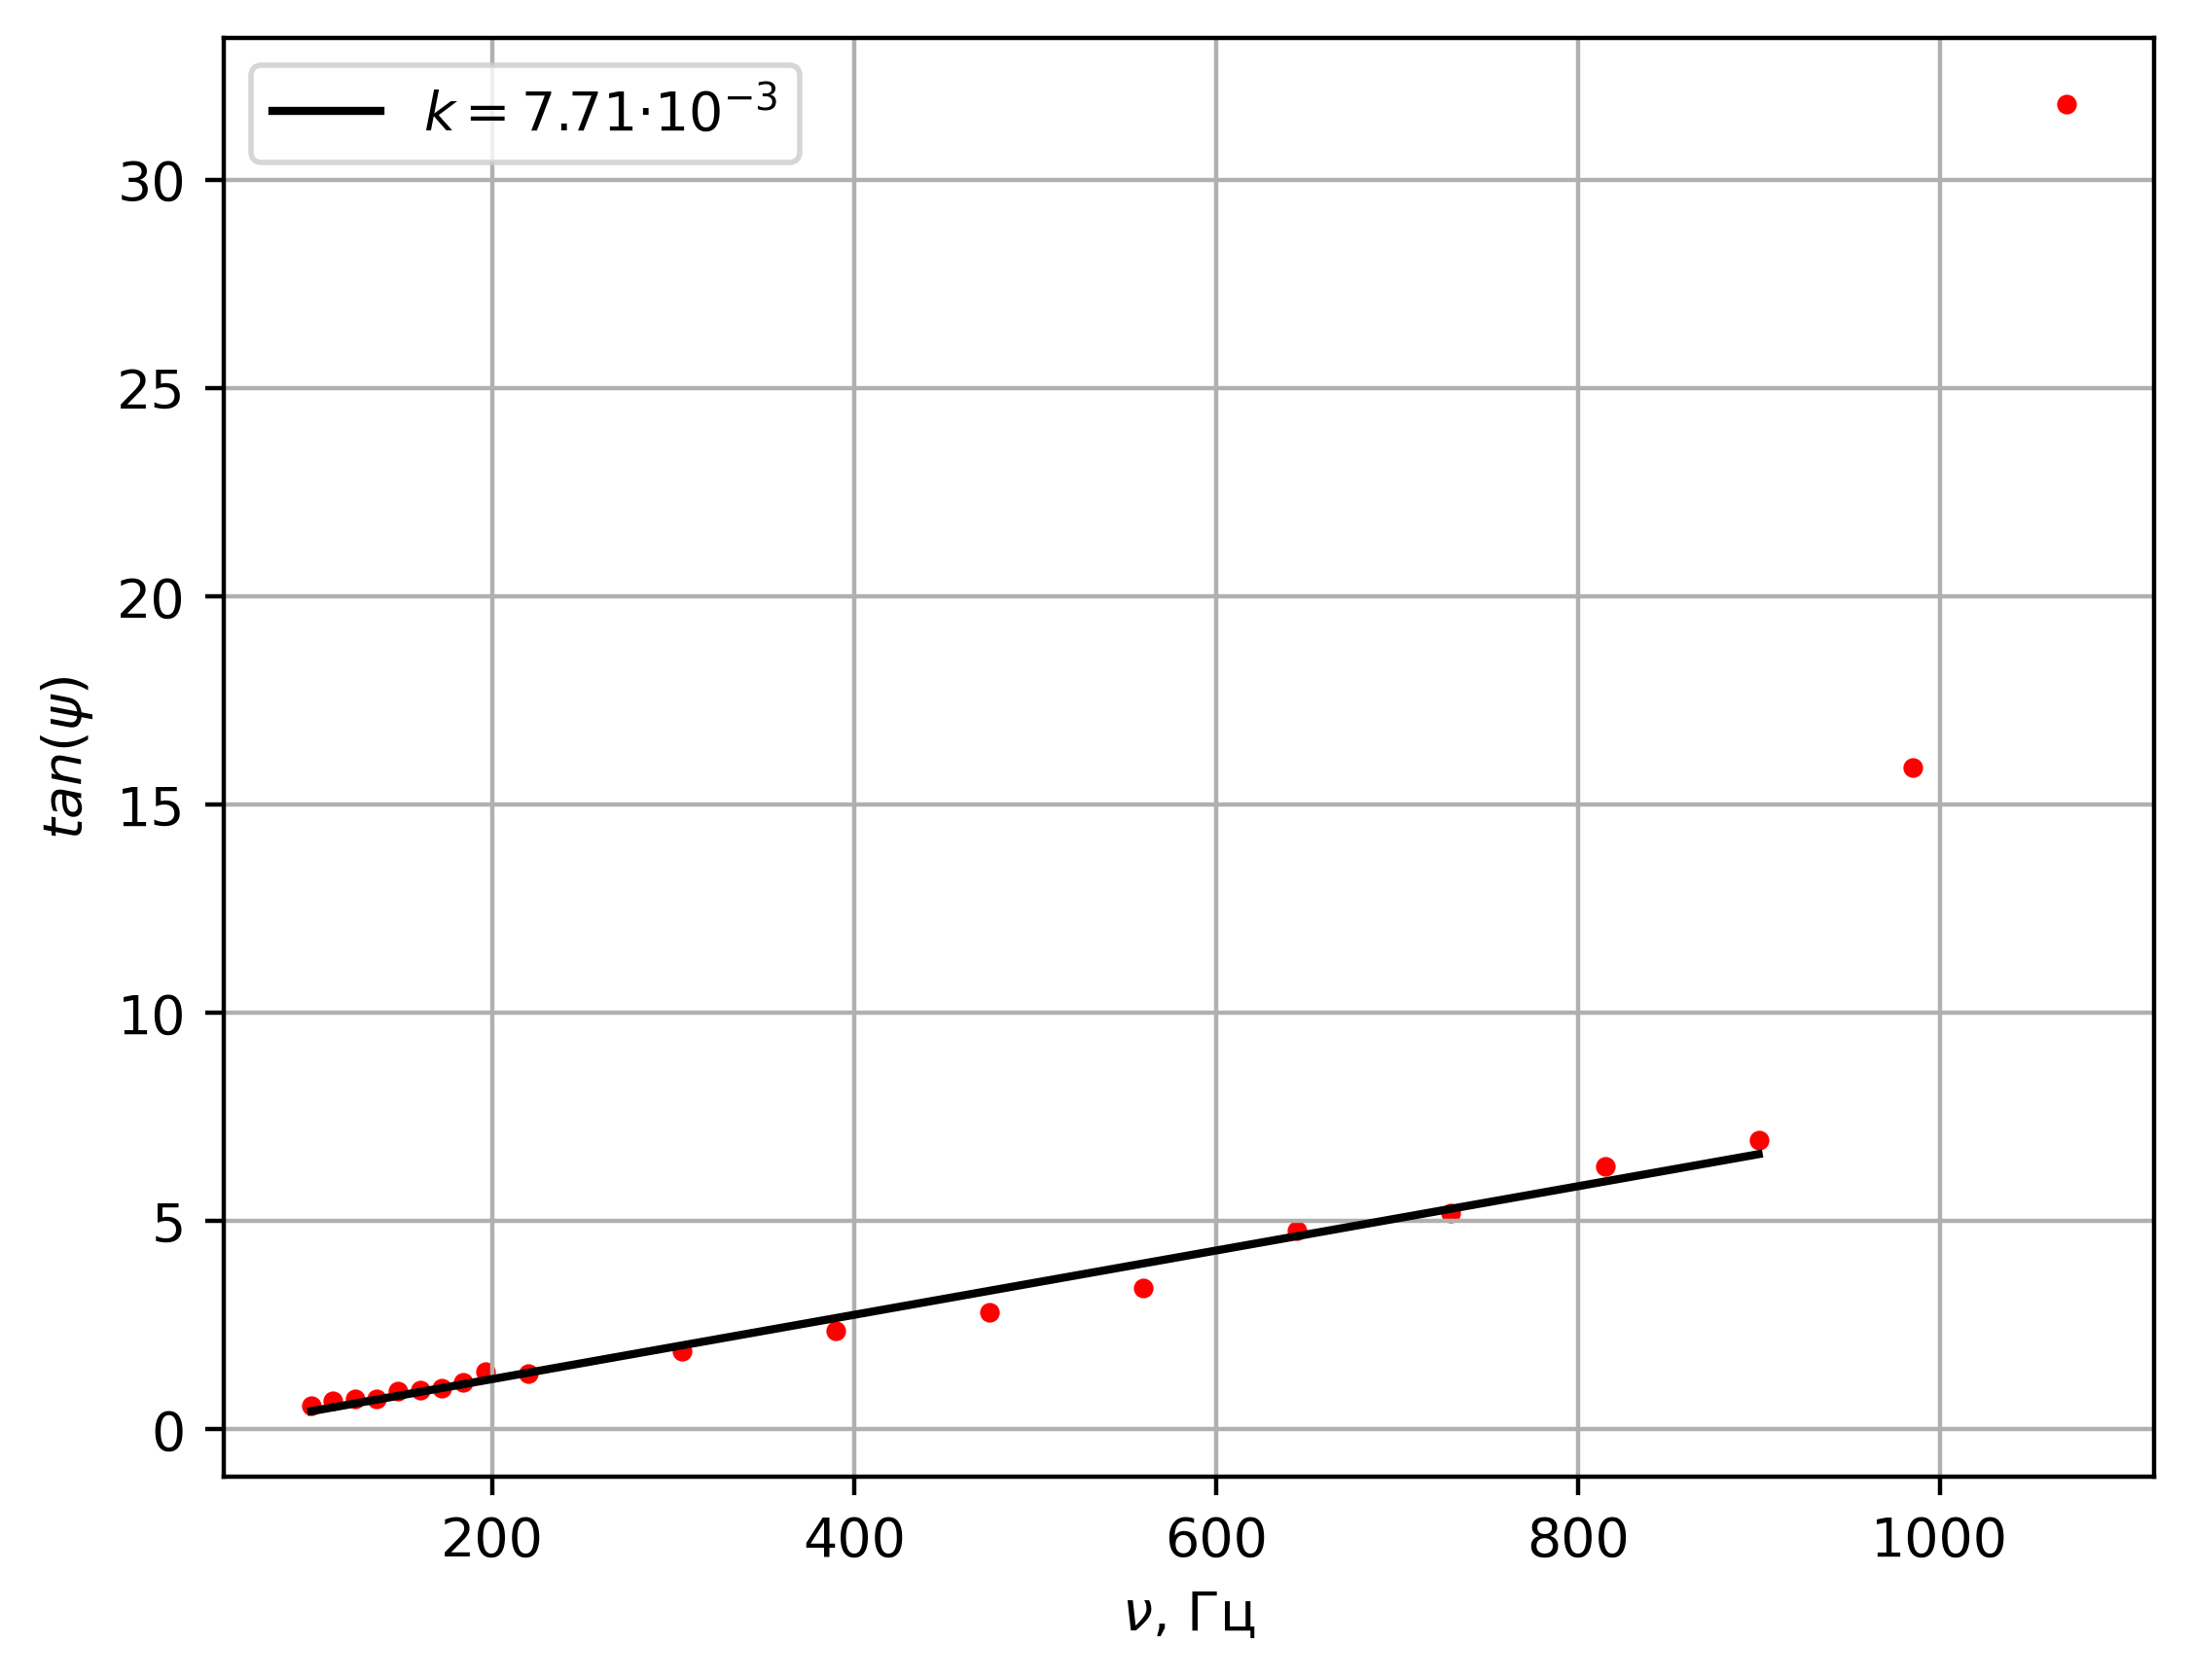

In [138]:
psi = np.array([8.5/25.5, 7/22.5, 6/20, 5.5/18.5, 4.5/17, 4/15.5, 3.5/14,
       3/13, 2.5/12.5, 4.5/22, 2.5/16, 4/31.5, 2.5/23, 4/44,
       2.5/38, 2/33, 1.5/30, 1/22, 0.5/25, 0.01])

nu = [100, 112, 124, 136, 148, 160, 172, 184, 196, 220, 305,
      390, 475, 560, 645, 730, 815, 900, 985, 1070]
psi = (psi + 0.5) * np.pi

x = nu
y = -np.tan(psi)

coeffs = np.polyfit(x[:18], y[:18], 1)
k = coeffs[0]
b = coeffs[1]
line_points = [k * number + b for number in x[:18]]
plt.figure(dpi=400)
plt.scatter(x, y, s=7., color='red')
line1 = plt.plot(x[:18], line_points, color='black')

plt.ylabel('$tan(\\psi)$')
plt.xlabel('$\\nu$, Гц')
plt.grid()
plt.legend(line1, [f'$k = {k * 1000:.2f}$''$\\cdot 10^{-3}$'])
plt.savefig('tanpsinu')

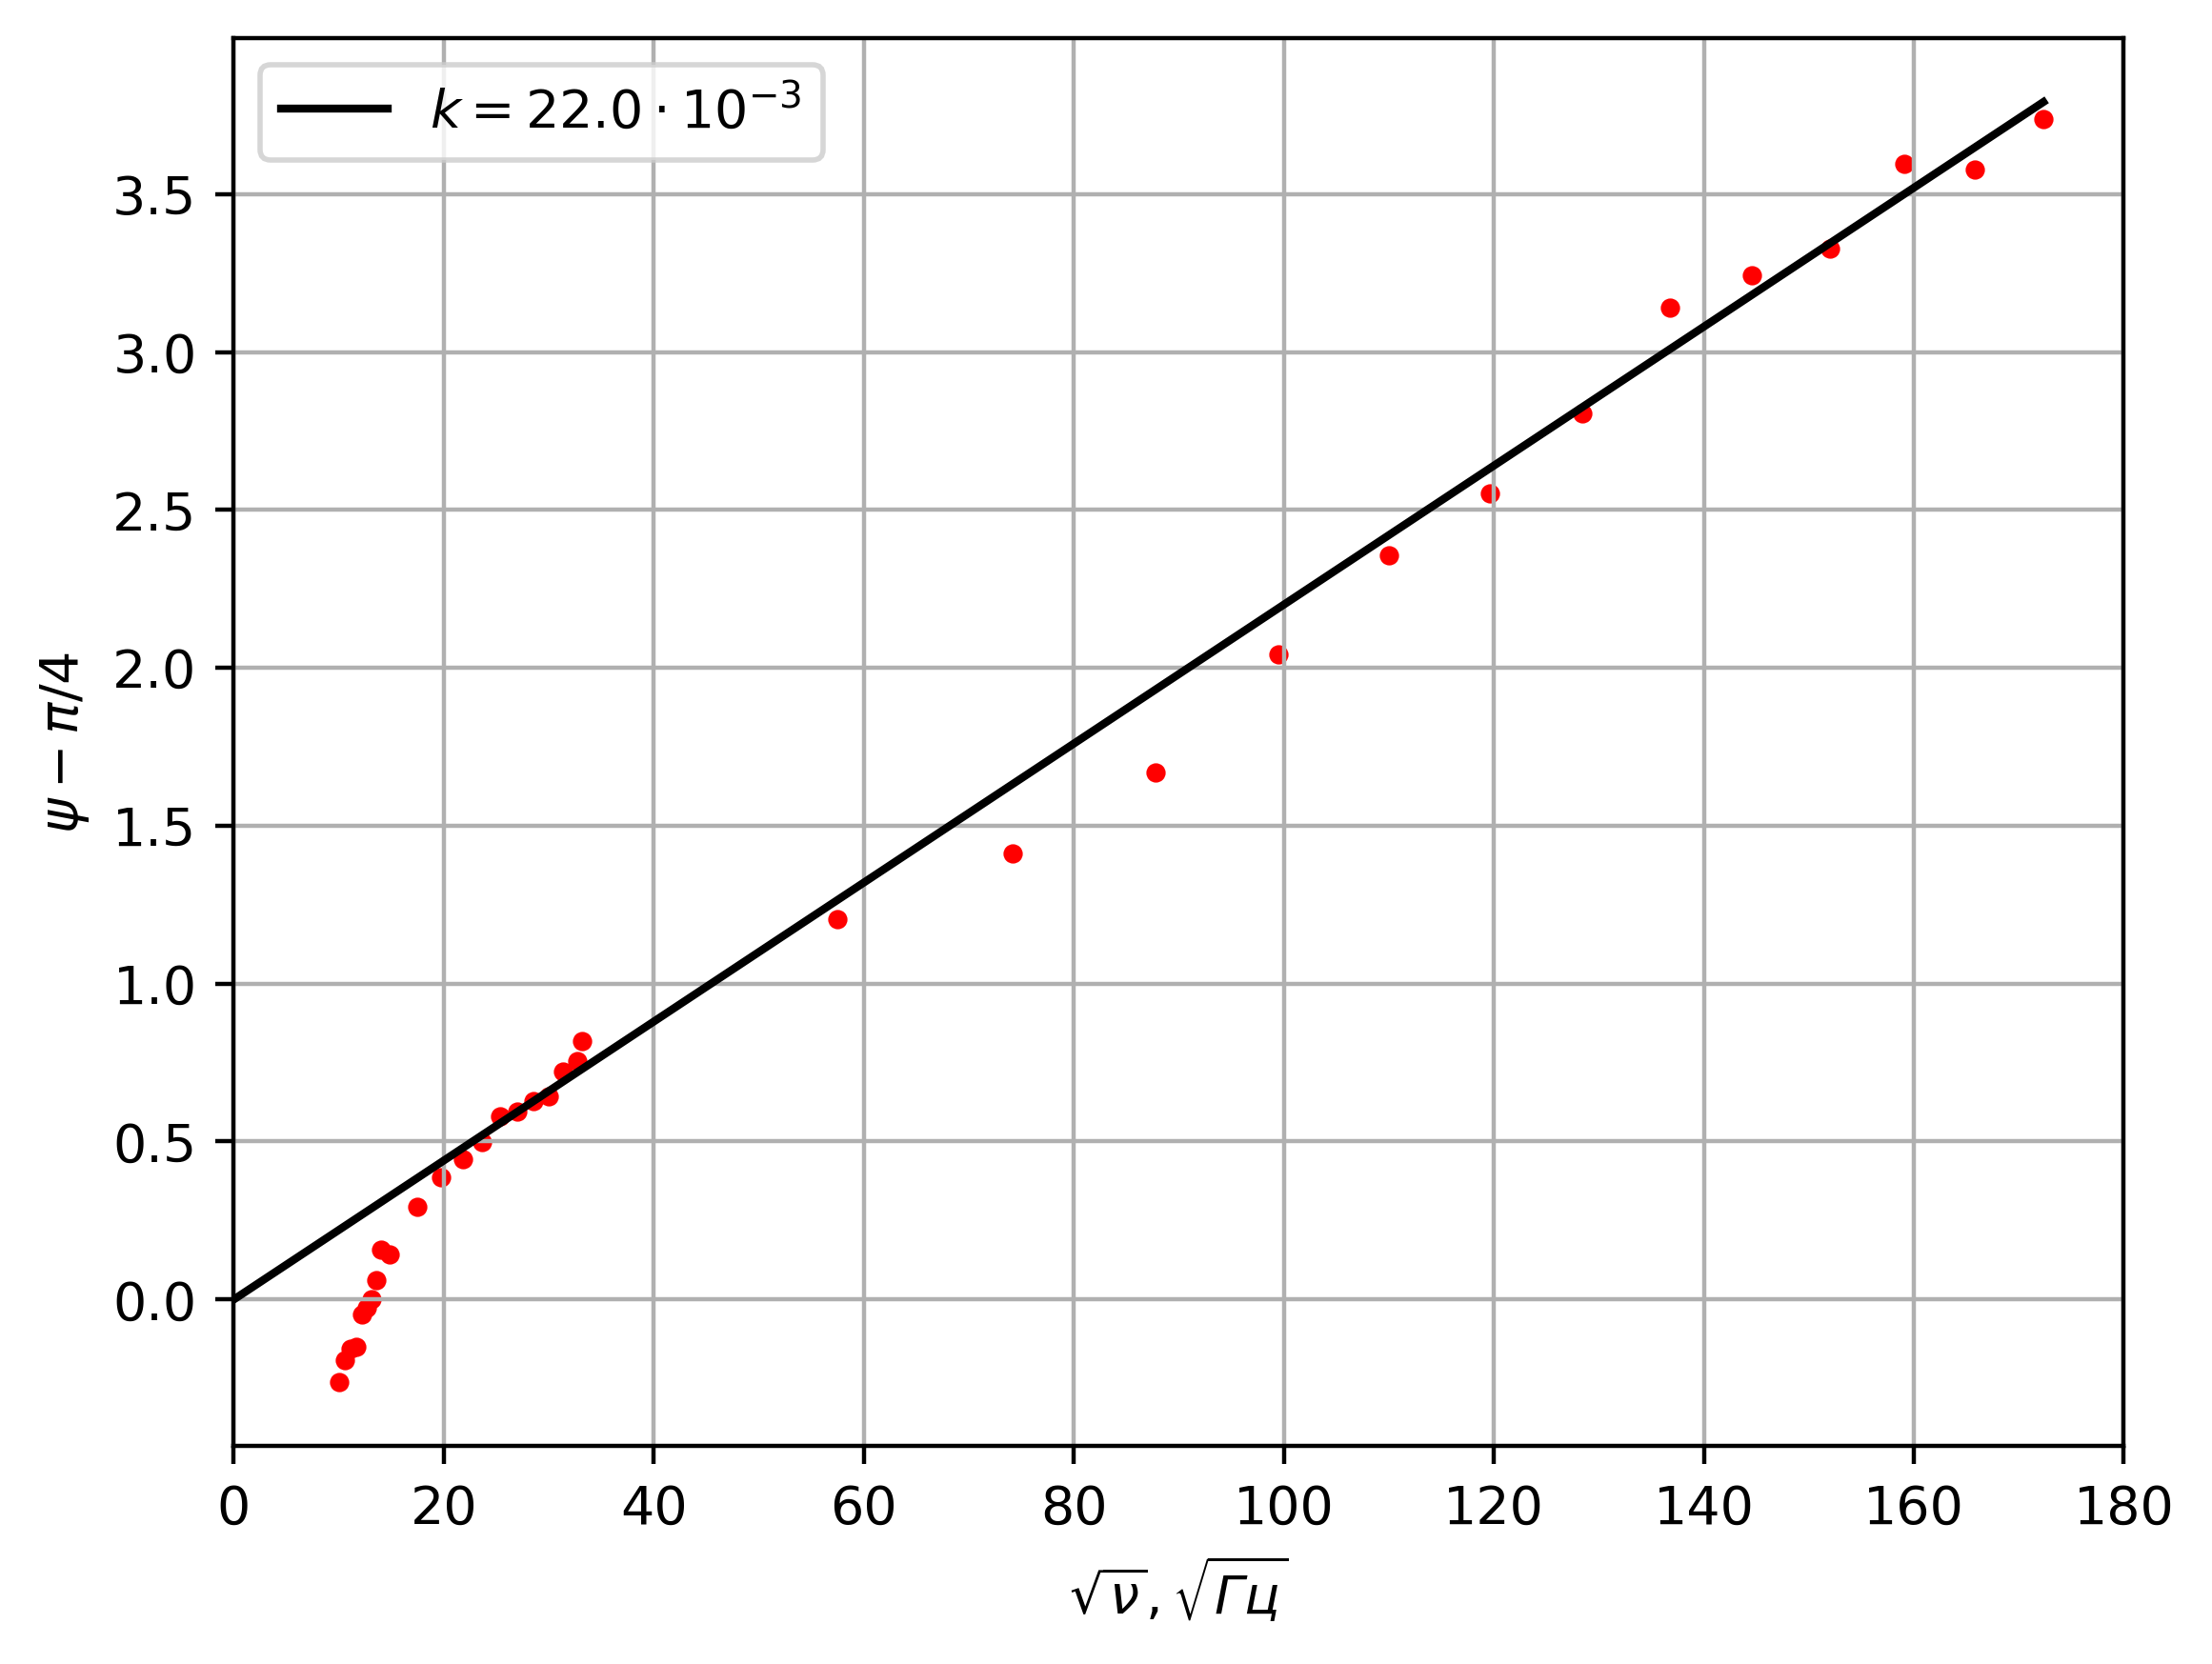

In [139]:
psi_1 = np.array([8.5/25.5, 7/22.5, 6/20, 5.5/18.5, 4.5/17, 4/15.5, 3.5/14,
       3/13, 2.5/12.5, 4.5/22, 2.5/16, 4/31.5, 2.5/23, 4/44,
       2.5/38, 2/33, 1.5/30, 1/22, 0.5/25, 0.01])
nu_1 = np.array([100, 112, 124, 136, 148, 160, 172, 184, 196, 220, 305,
      390, 475, 560, 645, 730, 815, 900, 985, 1070])
psi_1 = -(psi_1 - 0.5) * np.pi


psi_2 = np.array([0.01, 2/15, 4.5/22.5, 4.5/16, 5/12.5, 5/10, 4.5/8, 4.5/7,
                  4.5/6, 18/23, 17/21, 17/19, 16/18, 15.5/16.5])
psi_2 = (psi_2 + 0.5) * np.pi
nu_2 = np.array([1.1, 3.3, 5.5, 7.7, 9.9, 12.1, 14.3, 16.5, 18.7,
                 20.9, 23.1, 25.3, 27.5, 29.7])
nu_2 = nu_2 * 1000

x = np.array(np.sqrt(np.append(nu_1, nu_2)))
y = np.array(np.append(psi_1, psi_2) - np.pi/4)

x_1 = np.array(np.append([0], x[10:]))
y_1 = np.array(np.append([0], y[10:]))

coeffs = np.polyfit(x_1, y_1, 1)
k = coeffs[0]
b = coeffs[1]
line_points = [k * number for number in x_1]
plt.figure(dpi=400)
plt.scatter(x, y, s=7., color='red')
line1 = plt.plot(x_1, line_points, color='black')

plt.ylabel('$\\psi - \\pi/4$')
plt.xlabel('$\\sqrt{\\nu}, \\sqrt{Гц}$')
plt.xlim(0, 180)
plt.grid()
plt.legend(line1, [f'$k = {k * 1000:.1f}'' \\cdot 10^{-3}$'])
plt.savefig('psinu')

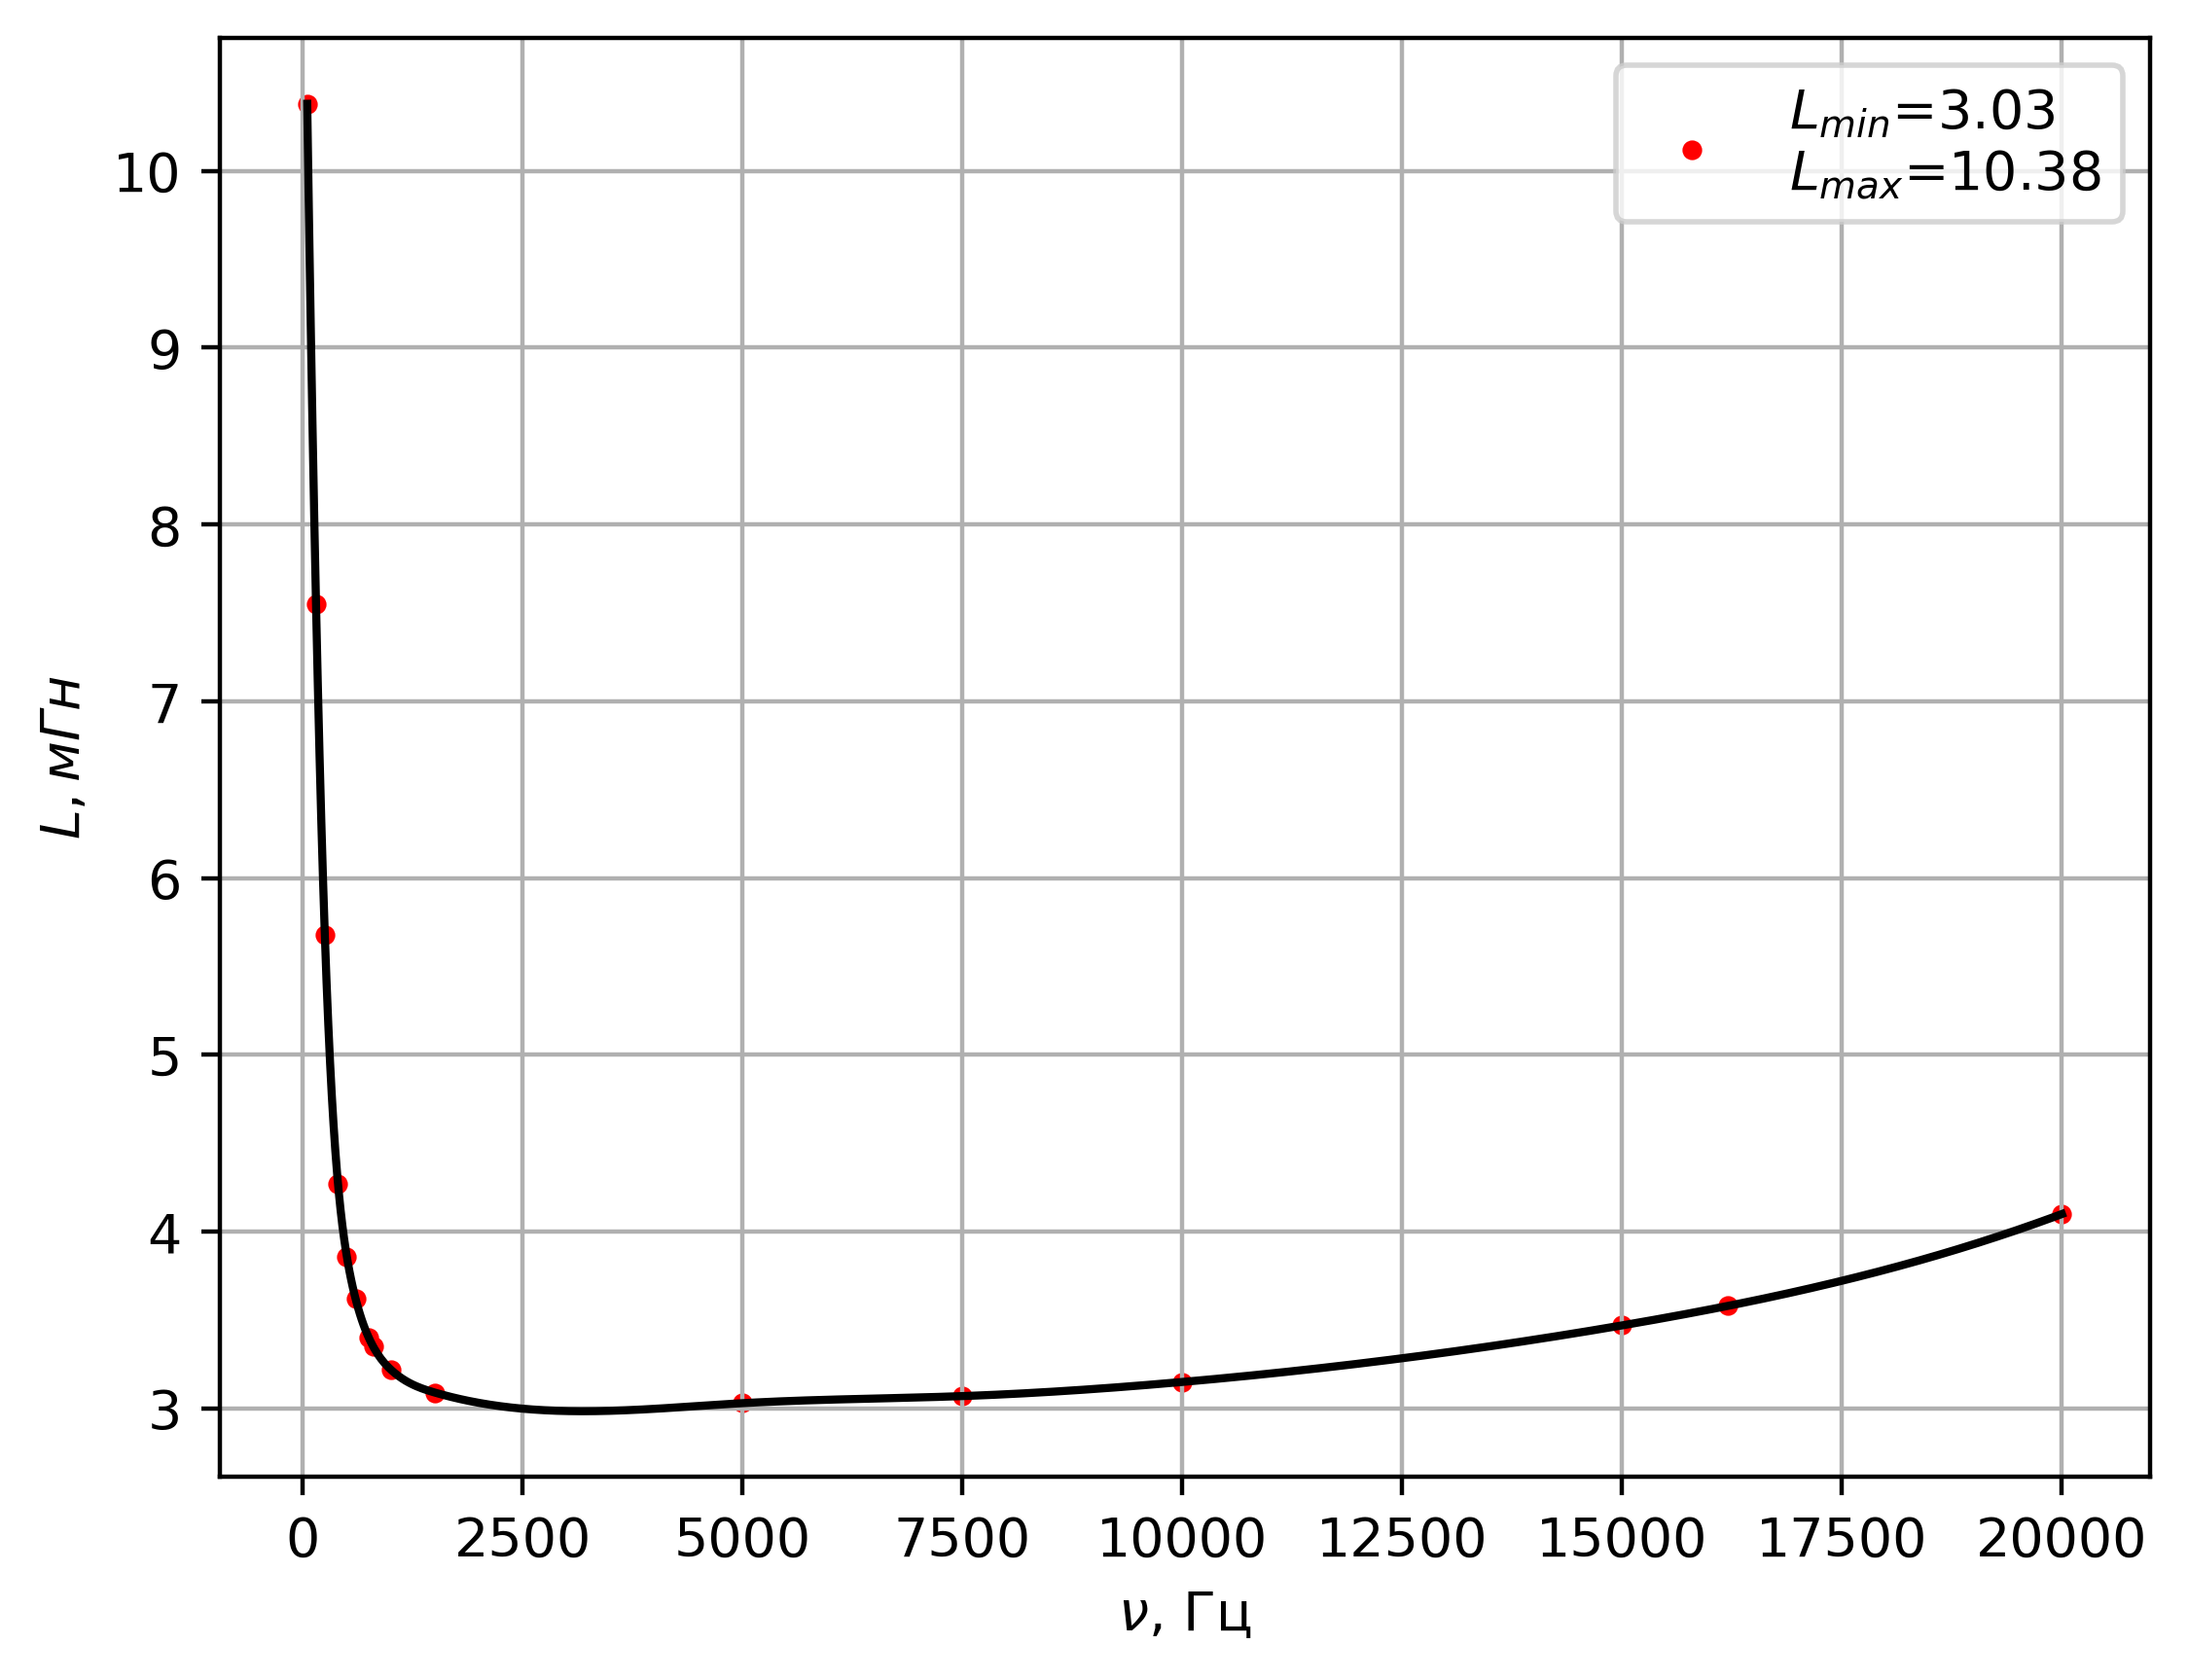

In [140]:
from scipy.interpolate import interp1d
nu = [50, 150, 250, 400, 500, 600, 750, 800, 1000, 1500, 5000,
      7500, 10000, 15000, 16200, 20000]

L = [10.38, 7.55, 5.68, 4.27, 3.86, 3.62, 3.40, 3.35, 3.22, 3.09,
     3.03, 3.07, 3.15, 3.47, 3.58, 4.1]

x = nu
x_new = np.linspace(50, 20000, 1000)
y = L
f = interp1d(x, y, kind= 'cubic')
y_new = f(x_new)
plt.figure(dpi=400)
plt.scatter(x, y, s=7., color='red')
plt.plot(x_new, y_new, c = 'black')

plt.ylabel('$L, мГн$')
plt.xlabel('$\\nu$, Гц')
plt.grid()
plt.legend(['$L_{min}$'f'={min(L)}\n''$L_{max}$'f'={max(L)}'])
plt.savefig('Lnu')

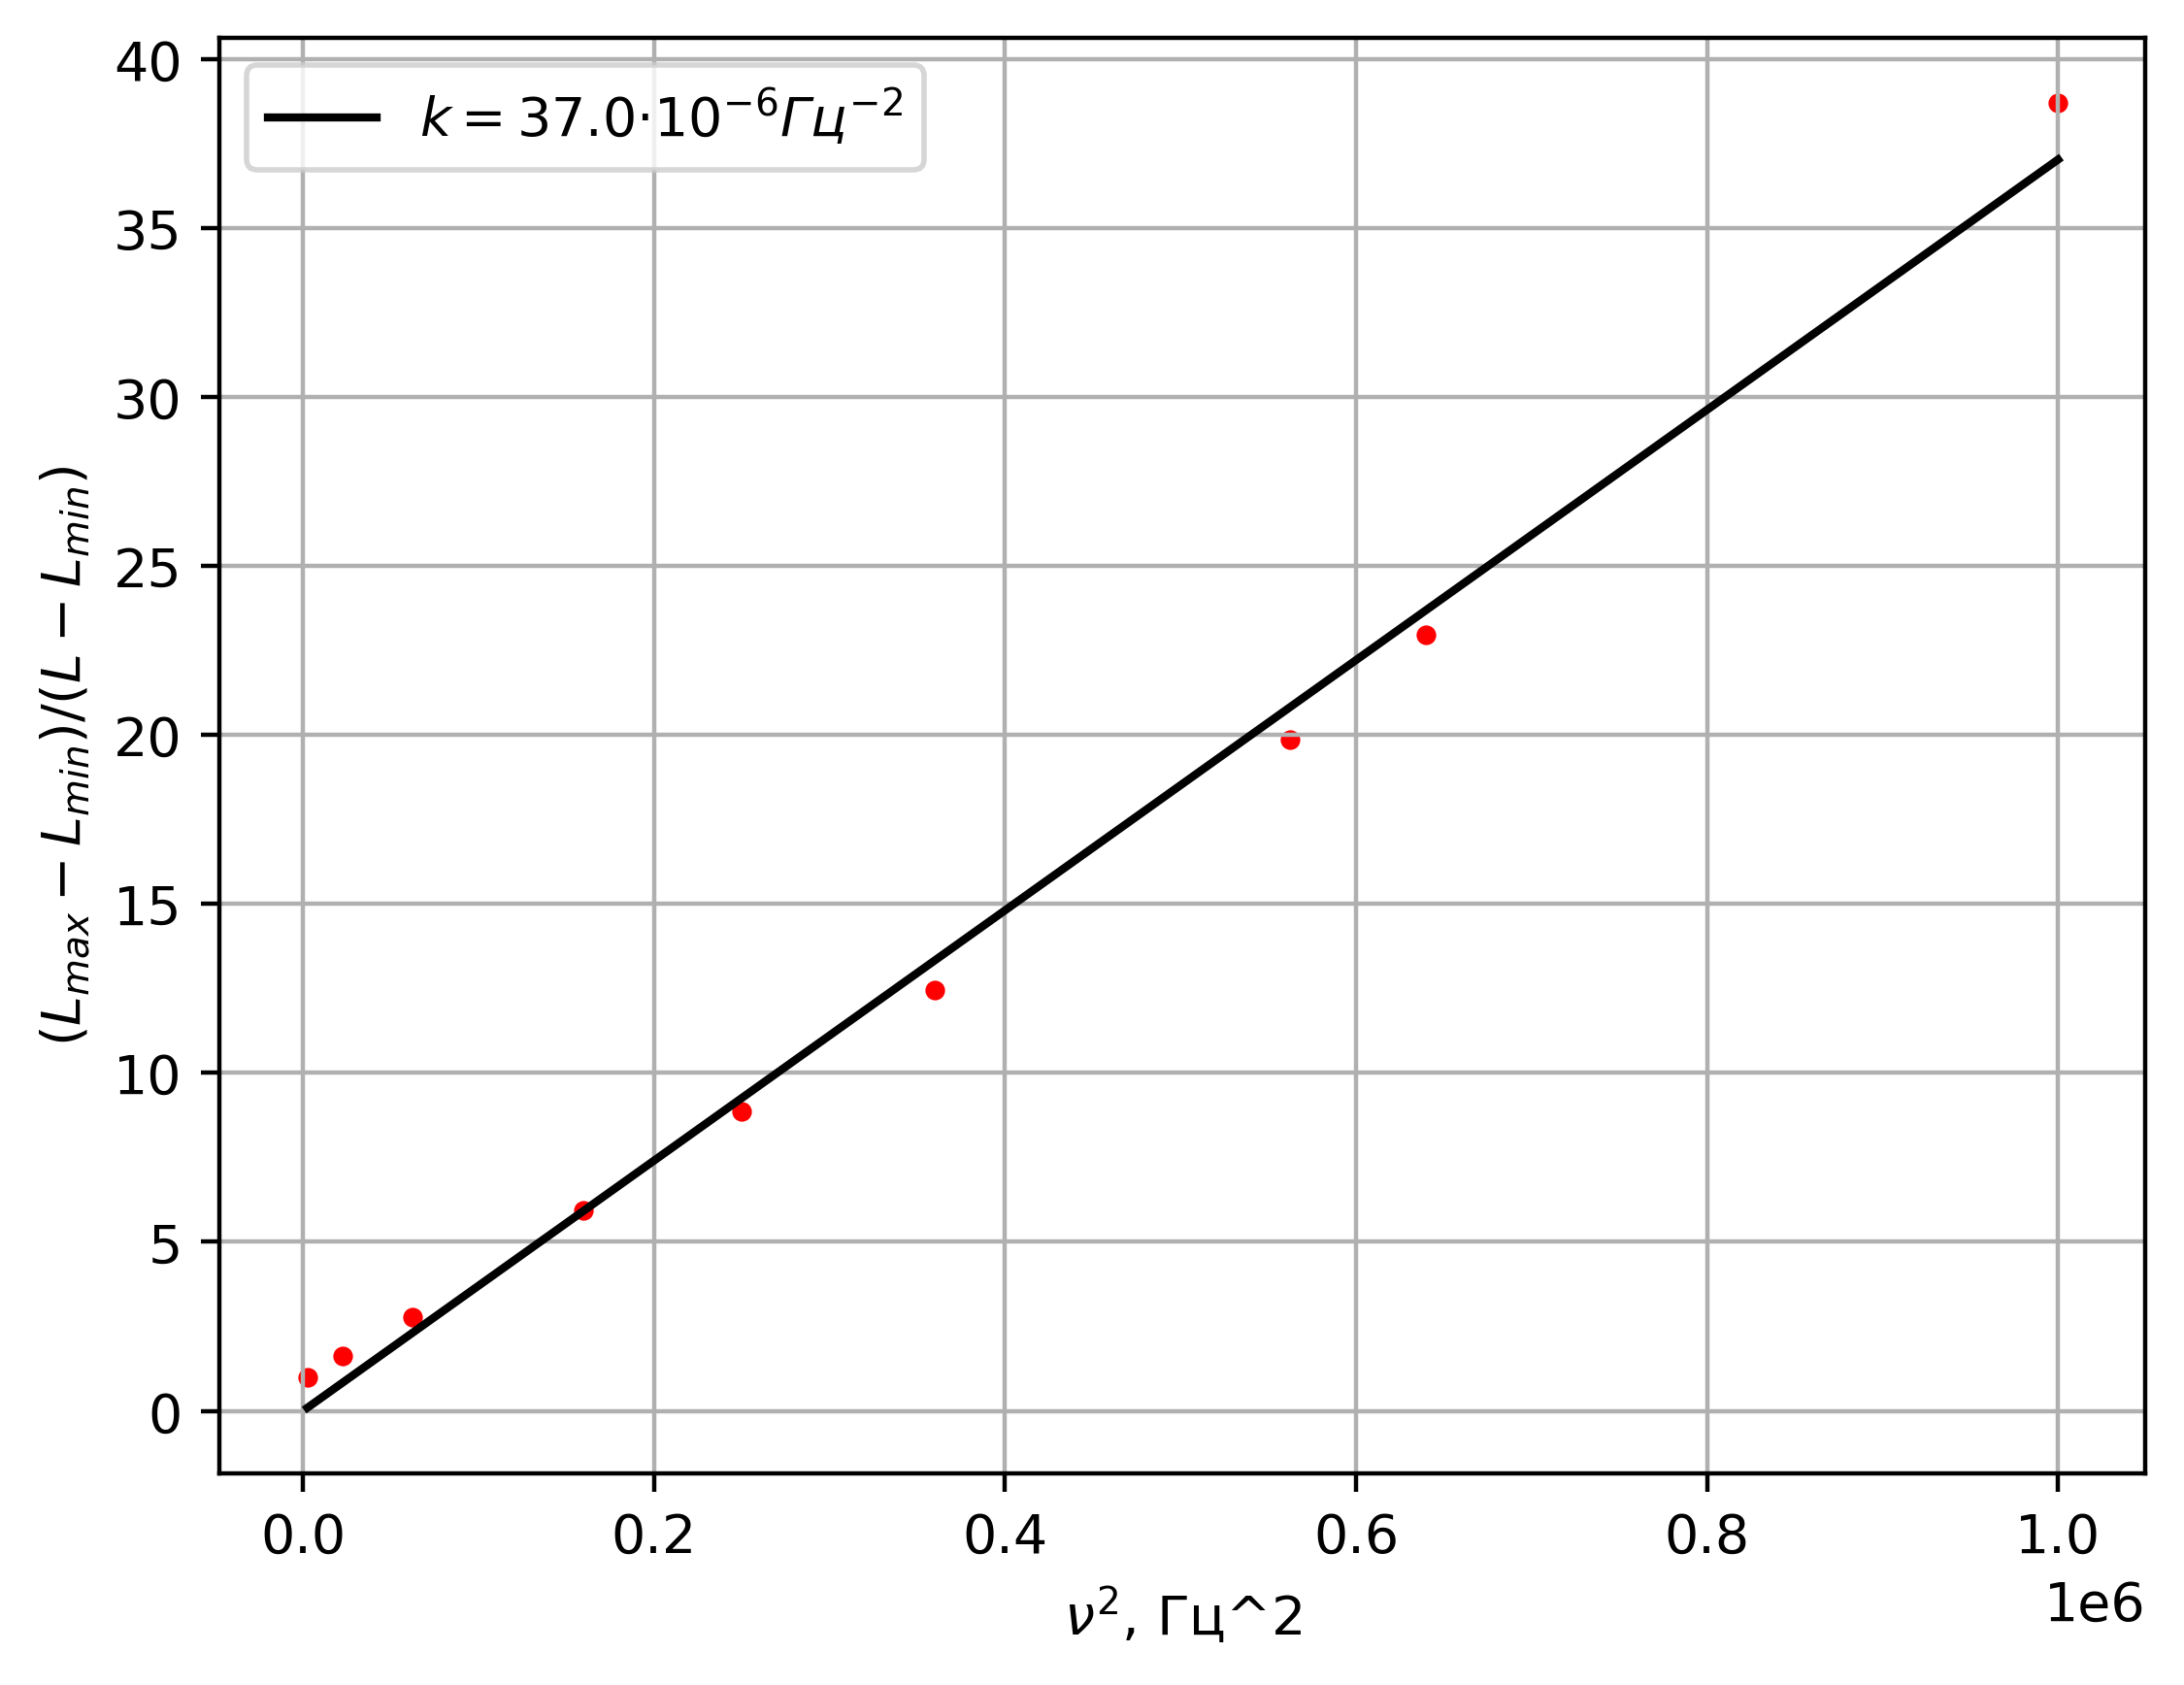

In [141]:
nu = np.array([50, 150, 250, 400, 500, 600, 750, 800, 1000, 1500, 5000,
               7500, 10000, 15000, 16200, 20000])

L = np.array([10.38, 7.55, 5.68, 4.27, 3.86, 3.62, 3.40, 3.35, 3.22, 3.09,
              3.03, 3.07, 3.15, 3.47, 3.58, 4.1])

x = nu[:-7] ** 2
y = (max(L) - min(L)) / (L[:-7] - min(L))

coeffs = np.polyfit(x, y, 1)
k = coeffs[0]
b = coeffs[1]
line_points = [k * number for number in x]
plt.figure(dpi=400)
plt.scatter(x, y, s=7., color='red')
line1 = plt.plot(x, line_points, color='black')

plt.ylabel('$(L_{max} - L_{min})/(L - L_{min})$')
plt.xlabel('$\\nu^2$, Гц^2')
plt.grid()
plt.legend(line1, [f'$k = {k * 10**6:.1f}$''$\\cdot 10^{-6} Гц^{-2}$'])
plt.savefig('lnu2')

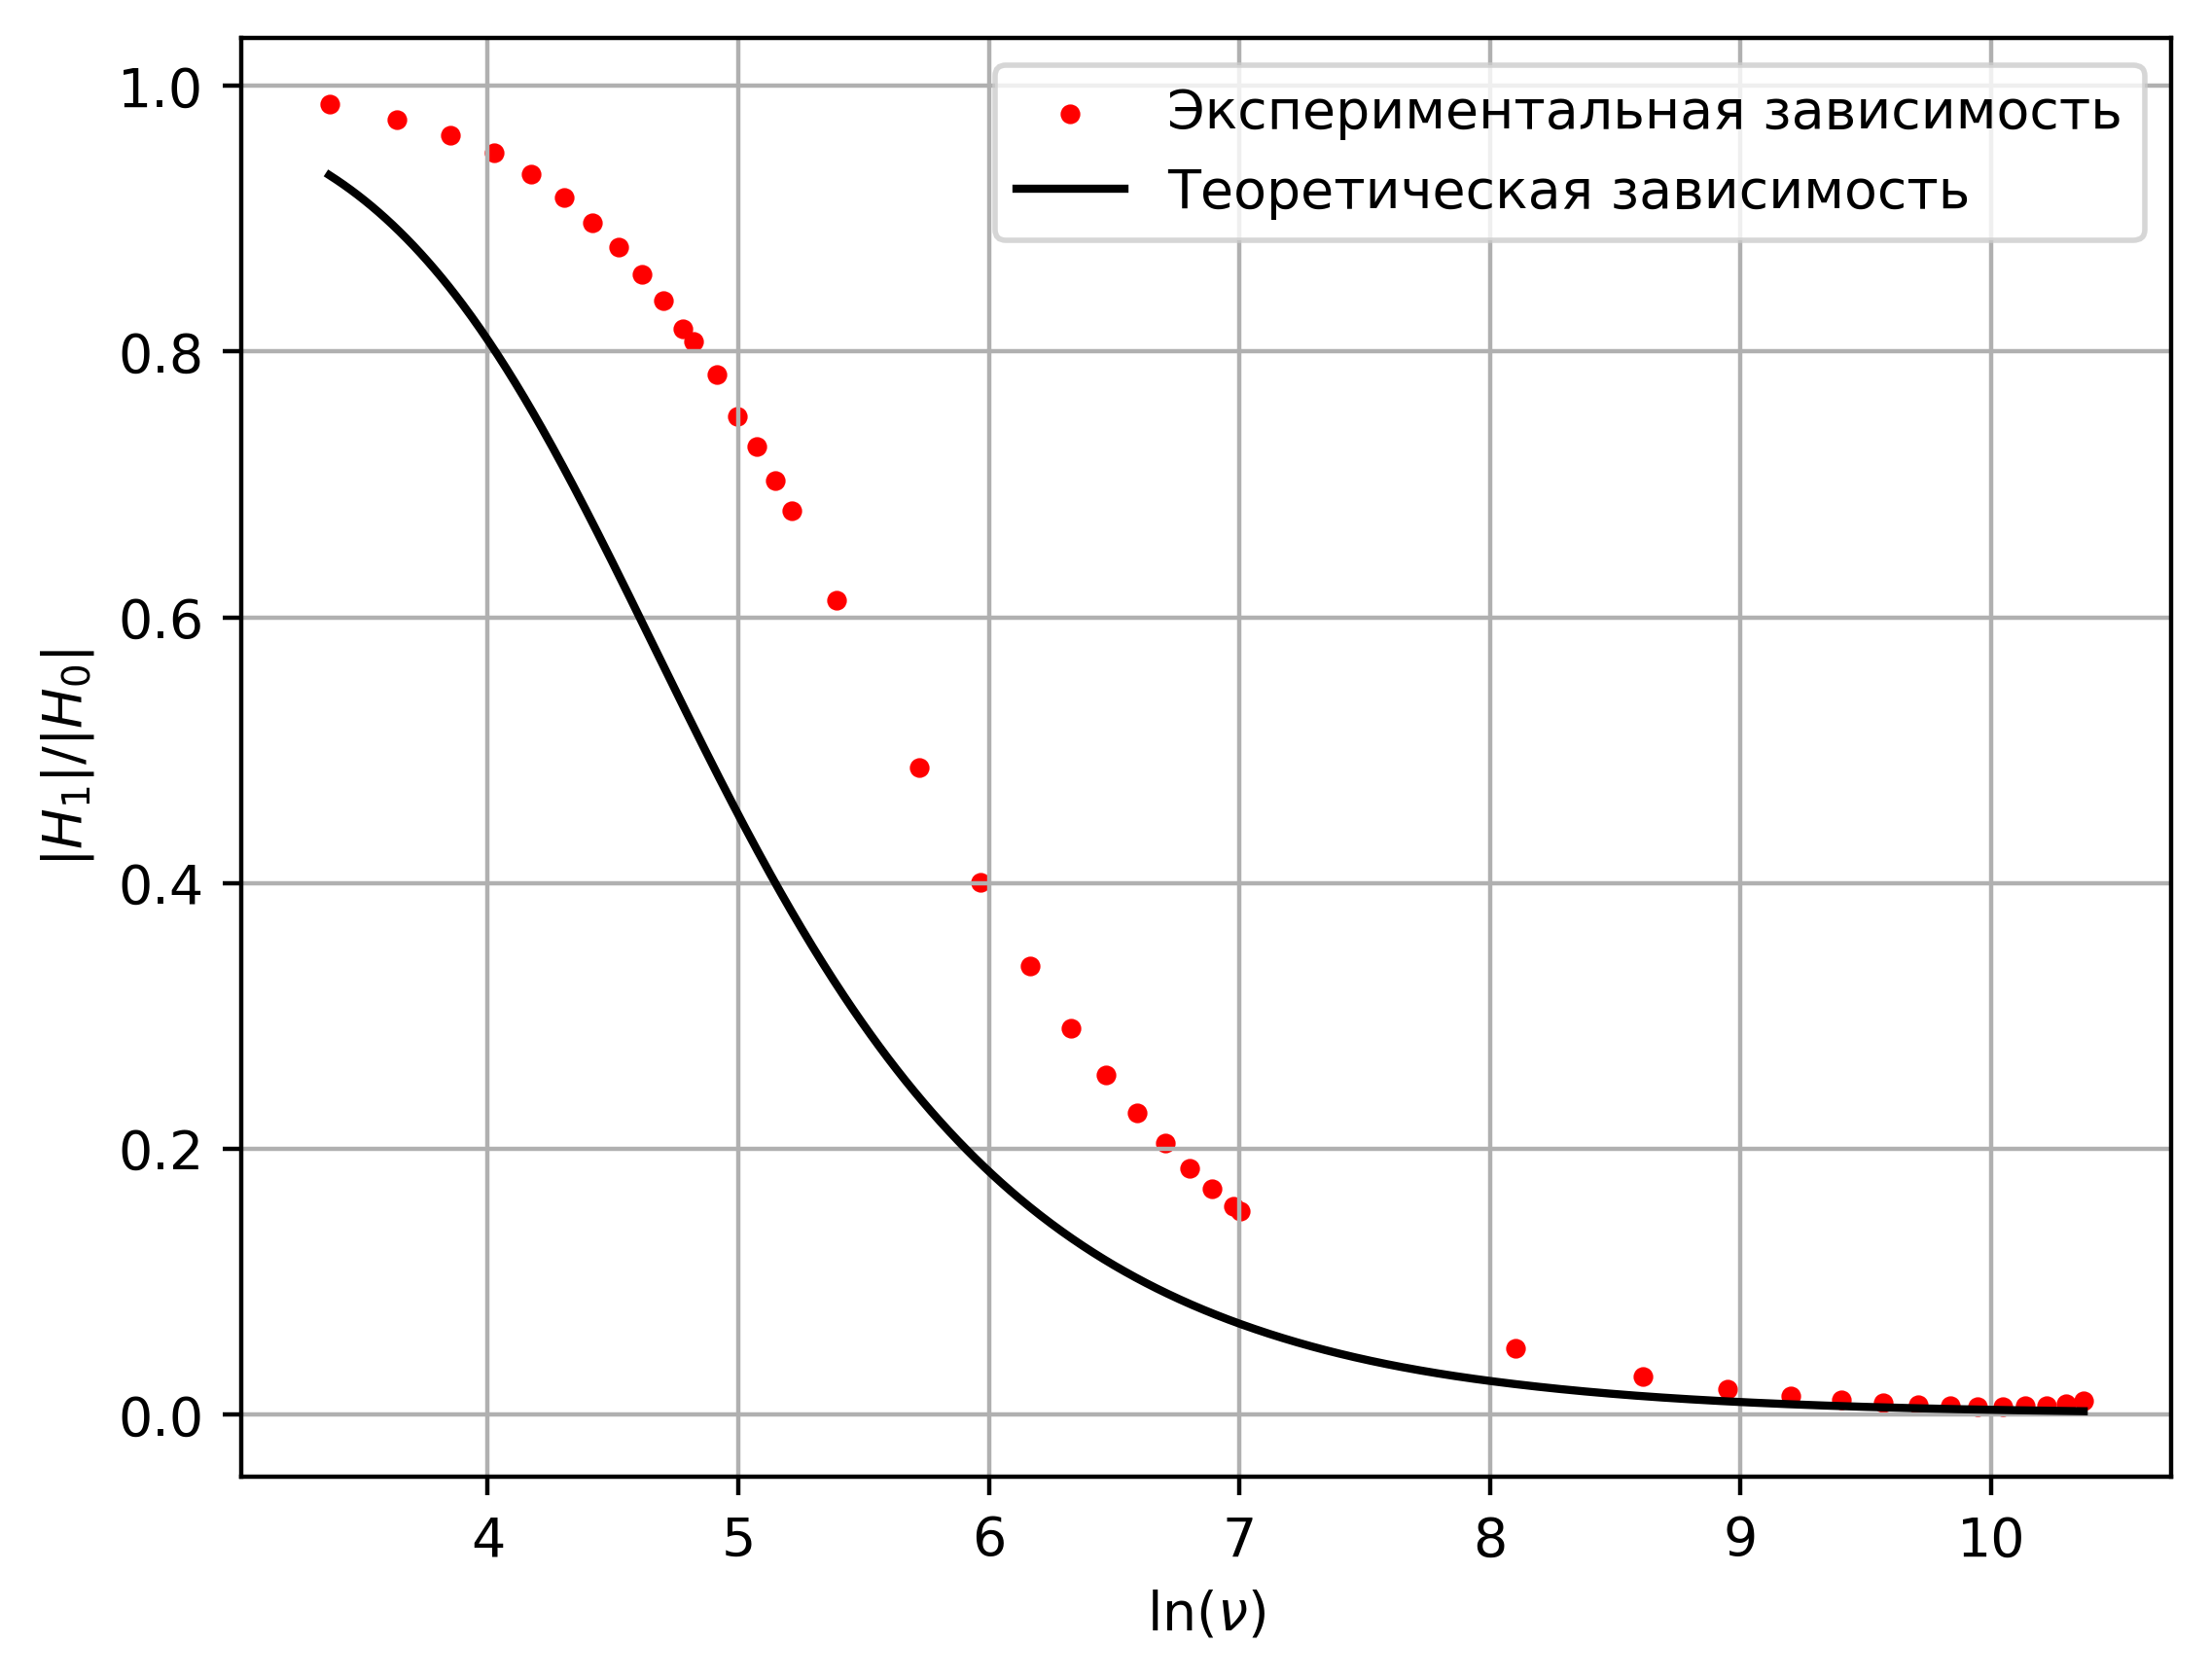

In [142]:
V = np.array([0.194, 0.249, 0.301, 0.349, 0.393,
              0.433, 0.469, 0.502, 0.531, 0.557, 0.580,
              0.590, 0.616, 0.637, 0.656, 0.672, 0.686,
              0.716, 0.752, 0.763, 0.764, 0.759, 0.752, 0.742,
              0.730, 0.717, 0.703, 0.688, 0.683, 0.368, 0.224,
              0.151, 0.108, 0.081, 0.062, 0.049, 0.040, 0.034,
              0.029, 0.025, 0.021, 0.017, 0.013])
I = np.array([465, 461, 456, 450, 444, 438, 432, 426, 420,
              414, 409, 404, 397, 393, 386, 381, 376, 364,
              347, 335, 327, 320, 313, 307, 301, 295, 288,
              281, 279, 153, 99, 71, 55, 43, 35, 28, 23,
              19, 15, 11, 7.7, 4.9, 2.7])
nu = np.array([29, 38, 47, 56, 65, 74, 83, 92, 101, 110, 119,
               124, 136, 148, 160, 172, 184, 220, 305, 390,
               475, 560, 645, 730, 815, 900, 985, 1070,
               1100, 3300, 5500, 7700, 9900, 12100, 14300, 16500, 18700,
               20900, 23100, 25300, 27500, 29700, 31900])

xi = V / (I * 0.001 * nu)
xi_0 = 0.01458339663
x = np.log(nu)
y = xi/xi_0
y_1 = 1/(np.sqrt(1+(0.01332396594 * nu)**2))
f1 = interp1d(x, y_1, kind = 'cubic')
x_new = np.linspace(np.min(x), np.max(x), 1000)
y_new = f1(x_new)
plt.figure(dpi=400)
plt.scatter(x, y, s=7, color='red')
plt.plot(x_new, y_new, color='black',)

plt.ylabel('$|H_1|/|H_0|$')
plt.xlabel('$\\ln(\\nu)$')
plt.grid()
plt.legend(['Экспериментальная зависимость', 'Теоретическая зависимость'])
plt.savefig('Hlnnu')